## Домашнее задание по теме: "Алгоритмы кластеризации"

Описание задания:

В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

### 1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

a) Для отображения картинки воспользуйтесь вспомогательной функцией:
```python
import matplotlib.pyplot as plt
import cv2
import skimage
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()
```

b) Для загрузки картинки можно использовать код:
```python
img = cv.imread(path)
```

In [ ]:
# загрузка csv в google colab
from google.colab import files
uploaded = files.upload()

Saving frog.png to frog.png


In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
img = cv.imread("./frog.png")

In [ ]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)

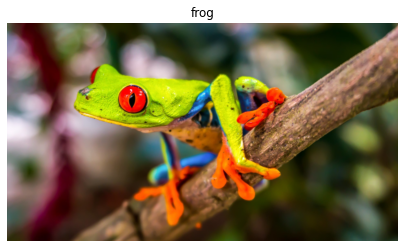

In [ ]:
draw_picture(img, 'frog')

In [ ]:
import numpy as np

# преобразуем изображение в массив numpy
pixel_values = np.array(img).reshape((-1, 3))

### 2. Реализуйте три модели кластеризации:

a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

b) DBSCAN

c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float

cl = (2, 5, 10, 20)

In [ ]:
### Kmeans

km_img_list = []
km_ssim = {}

for i, c in enumerate(cl):
    km = KMeans(n_clusters=c, random_state=42, n_init=2).fit(pixel_values)

    # получаем новые значения цветов для каждого пикселя
    new_pixel_values = np.uint8(km.cluster_centers_[km.labels_])

    # получаем новое изображение
    km_img_list.append(new_pixel_values.reshape(img.shape))
  
    # получаем ssim метрику
    km_ssim[f'{c}cs'] = round(ssim(img, km_img_list[i], channel_axis=2), 5)

km_ssim

{'2cs': 0.54697, '5cs': 0.61584, '10cs': 0.66648, '20cs': 0.72218}

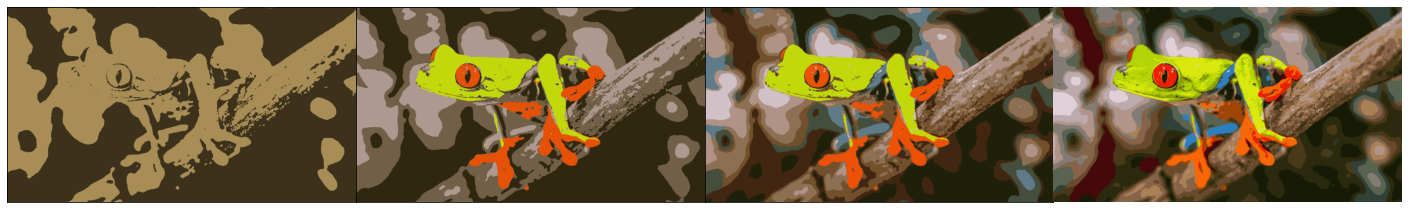

In [ ]:
# отрисовываем изображения
fig, ax = plt.subplots(ncols=4, figsize=(25, 25))

for i, img in enumerate(km_img_list):
    ax[i].imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.show()

---

In [ ]:
### алгоритм DBSCAN

db_ssim = {}
db = DBSCAN(eps=5, min_samples=100).fit(pixel_values)

new_pixel_values = pixel_values.copy()

# получение меток кластеров
labels = db.labels_

# перебор уникальных меток кластеров
for label in set(labels):
    # выбор элементов, принадлежащих данному кластеру
    mask = labels == label
    cluster = new_pixel_values[mask]

    # вычисление среднего значения цвета для кластера
    mean = np.mean(cluster, axis=0)

    # замена цветов на средние значения в кластере
    new_pixel_values[mask] = mean

# получаем ssim метрику
db_ssim[f'{len(set(labels))}cs'] = round(ssim(img, new_pixel_values.reshape(img.shape), channel_axis=2), 5)
db_ssim

{'12cs': 0.43173}

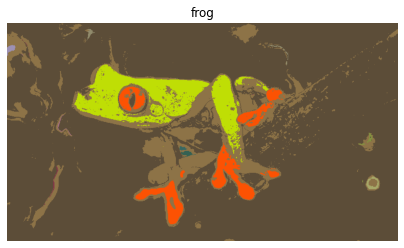

In [ ]:
# отрисовываем изображение
draw_picture(new_pixel_values.reshape(img.shape), 'frog')

---

In [ ]:
### Алгоритм AgglomerativeClustering
ac_img_list = []
ac_ssim = {}

# в связи с ограничением в оперативной памяти, изменяем разрешение изображения 
img_lr = cv.resize(img, (229, 128))
pixel_values_lr = np.array(img_lr).reshape((-1, 3))

for i, c in enumerate(cl):
    # определяем кластеры
    ac = AgglomerativeClustering(n_clusters=c).fit(pixel_values_lr)

    new_pixel_values = pixel_values_lr.copy()

    # получение меток кластеров
    labels = ac.labels_

    # перебор уникальных меток кластеров
    for label in set(labels):
        # выбор элементов, принадлежащих данному кластеру
        mask = labels == label
        cluster = new_pixel_values[mask]

        # вычисление среднего значения цвета для кластера
        mean = np.mean(cluster, axis=0)

        # замена цветов на средние значения в кластере
        new_pixel_values[mask] = mean

    # добавлем новое изображение к списку
    ac_img_list.append(new_pixel_values.reshape(img_lr.shape))

    # получаем ssim метрику
    ac_ssim[f'{len(set(labels))}cs'] = round(ssim(img_lr, ac_img_list[i], channel_axis=2), 5)
    
ac_ssim

{'2cs': 0.44901, '5cs': 0.6618, '10cs': 0.80107, '20cs': 0.93523}

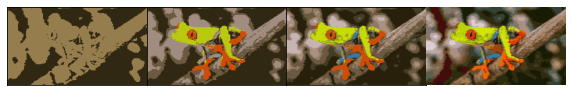

In [ ]:
# отрисовываем изображения
fig, ax = plt.subplots(ncols=4, figsize=(10, 10))

for i, img in enumerate(ac_img_list):
    ax[i].imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.show()

### 3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

| Алгоритм (кол-во кластеров) | Метрика SSIM |
| - | - |
| DBSCAN (12) | 0.43173 |
| AgglomerativeClustering (2) | 0.44901 |
| Kmeans (2) | 0.54697 |
| Kmeans (5) | 0.61584 |
| AgglomerativeClustering (5) | 0.6618 |
| Kmeans (10) | 0.66648 |
| Kmeans (20) | 0.72218 |
| AgglomerativeClustering (10) | 0.80107 |
| AgglomerativeClustering (20) | 0.93523 |


### 4. Сформулируйте выводы по проделанной работе.

a) Какая модель показала лучший результат?


В процессе выполнения задания получил базовый опыт работы с алгоритмами кластеризации.

Наилучшим алгоритмом для сокращения цветового пространства оказался `Kmeans` (визуально, по скорости работы и по ресурсам).

Алгоритм `DBSCAN` показал плохие результаты как в плане метрики так и визуально.

Алгоритм `AgglomerativeClustering` очень требователен к ресурсам, пришлось значительно уменьшить разрешение изображения.